In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
beers = pd.read_csv('/Users/ilyasshomayev/work/projects/style_review/style_reviews.csv')

In [11]:
#Reviews of 23 highest rated types of beer from beeradvocate.com
#Contains:
#rank/ratings/scores/score breakdown(taste, smell, look, feel, overall),
#alcohol by volume(abv),
#beer type, brewery, and location,
#author, date and text of the review
beers.head()

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
0,10.20%\n\t\t,dsshuck,American Barleywine,"Bell's Brewery, Inc.",rDev,"Oct 13, 2016",feel: 4,Michigan,United States,look: 4,Third Coast Old Ale,overall: 4,"#1,737",4.12,-0.5%,4.10,smell: 4,taste: 4.25,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
1,10.20%\n\t\t,MikeWard,American Barleywine,"Bell's Brewery, Inc.","rDev 12oz bottle into a pint glass(sorry, tuli...","Oct 07, 2016",feel: 3.5,Michigan,United States,look: 3.75,Third Coast Old Ale,overall: 3.75,"#1,737",4.12,-8.5%,3.77,smell: 3.5,taste: 4,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
2,10.20%\n\t\t,MeLoynes,American Barleywine,"Bell's Brewery, Inc.",rDev,"Sep 28, 2016",feel: 3.75,Michigan,United States,look: 4.5,Third Coast Old Ale,overall: 3.75,"#1,737",4.12,-6.3%,3.86,smell: 4,taste: 3.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
3,10.20%\n\t\t,Marklaker,American Barleywine,"Bell's Brewery, Inc.",rDev,"Sep 27, 2016",feel: 4.25,Michigan,United States,look: 4.25,Third Coast Old Ale,overall: 4.25,"#1,737",4.12,+3.2%,4.25,smell: 4.25,taste: 4.25,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
4,10.20%\n\t\t,duvel1979,American Barleywine,"Bell's Brewery, Inc.",rDev,"Sep 24, 2016",feel: 3.5,Michigan,United States,look: 3.5,Third Coast Old Ale,overall: 3.5,"#1,737",4.12,-15%,3.50,smell: 3.5,taste: 3.5,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [12]:
#cleaning
beers.abv = beers.abv.str.strip().str.replace('%','')

In [13]:
beers[['beer_type', 'name']].drop_duplicates().groupby('beer_type').name.count()

beer_type
American Barleywine                 100
American Double / Imperial IPA       99
American Double / Imperial Stout    100
American IPA                        100
American Pale Ale (APA)             100
American Porter                      98
American Stout                       99
American Strong Ale                  99
American Wild Ale                   100
Berliner Weissbier                   97
Dubbel                               99
English Barleywine                  100
Flanders Red Ale                     95
Gueuze                               73
Hefeweizen                           97
Lambic - Fruit                       93
Lambic - Unblended                   60
Milk / Sweet Stout                   99
Oatmeal Stout                        93
Old Ale                              97
Quadrupel (Quad)                     99
Russian Imperial Stout               98
Saison / Farmhouse Ale               98
Name: name, dtype: int64

In [14]:
#cleaning
beers.content = beers.content.str.replace('rDev', '').str.strip()

In [15]:
#Checking for review date consistency
print(beers[beers.date.str.contains('Today')].content.count())
print(beers[beers.date.str.contains('Yesterday')].content.count())
print(beers[beers.date.str.contains('Thursday')].content.count())
print(beers[beers.date.str.contains('Wednesday')].content.count())
print(beers[beers.date.str.contains('Tuesday')].content.count())
print(beers[beers.date.str.contains('Monday')].content.count())
print(beers[beers.date.str.contains('Sunday')].content.count())
print(beers[beers.date.str.contains('Saturday')].content.count())
print(beers[beers.date.str.contains('Friday')].content.count())

162
169
0
209
210
189
277
44
0


In [16]:
#cheking the latest date in October
beers[beers.date.str.contains('Oct.....2017')].date.sort_values(ascending = False)

255813    Oct 14, 2017
54889     Oct 14, 2017
476659    Oct 14, 2017
216423    Oct 14, 2017
405621    Oct 14, 2017
503776    Oct 14, 2017
526043    Oct 14, 2017
467745    Oct 14, 2017
172637    Oct 14, 2017
278090    Oct 14, 2017
127981    Oct 14, 2017
46655     Oct 14, 2017
291226    Oct 14, 2017
127466    Oct 14, 2017
328298    Oct 14, 2017
385989    Oct 14, 2017
448626    Oct 14, 2017
281573    Oct 14, 2017
251805    Oct 14, 2017
212386    Oct 14, 2017
409021    Oct 14, 2017
513260    Oct 14, 2017
174848    Oct 14, 2017
417015    Oct 14, 2017
285752    Oct 14, 2017
219931    Oct 14, 2017
517231    Oct 14, 2017
244020    Oct 14, 2017
381370    Oct 14, 2017
301892    Oct 14, 2017
              ...     
476476    Oct 01, 2017
189829    Oct 01, 2017
190090    Oct 01, 2017
190729    Oct 01, 2017
190730    Oct 01, 2017
316254    Oct 01, 2017
484672    Oct 01, 2017
386769    Oct 01, 2017
169402    Oct 01, 2017
487432    Oct 01, 2017
134756    Oct 01, 2017
134996    Oct 01, 2017
135204    O

In [17]:
#cleaning the date column
beers.date = beers.date.replace('Today.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Yesterday.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Wednesday.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Tuesday.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Monday.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Sunday.*', 'Oct 20, 2017', regex=True)
beers.date = beers.date.replace('Saturday.*', 'Oct 20, 2017', regex=True)

In [18]:
#double check
print(beers[beers.date.str.contains('Today')].content.count())
print(beers[beers.date.str.contains('Yesterday')].content.count())
print(beers[beers.date.str.contains('Thursday')].content.count())
print(beers[beers.date.str.contains('Wednesday')].content.count())
print(beers[beers.date.str.contains('Tuesday')].content.count())
print(beers[beers.date.str.contains('Monday')].content.count())
print(beers[beers.date.str.contains('Sunday')].content.count())
print(beers[beers.date.str.contains('Saturday')].content.count())
print(beers[beers.date.str.contains('Friday')].content.count())

0
0
0
0
0
0
0
0
0


In [19]:
#cleaning the user score columns
beers.feel = beers.feel.str.replace('feel:','').astype('float')
beers.look = beers.look.str.replace('look:','').astype('float')
beers.overall = beers.overall.str.replace('overall:','').astype('float')
beers.smell = beers.smell.str.replace('smell:','').astype('float')
beers.taste = beers.taste.str.replace('taste:','').astype('float')

In [40]:
# beers['rank'] = beers['rank'].str.replace('#','').str.replace(',','').str.replace('-','').astype('int')
beers['rank'] = beers['rank'].str.replace('#','').str.replace(',','')
beers[beers['rank'] != '-'].name.unique()

array(['Third Coast Old Ale', 'Theakston Old Peculier',
       'Adam From The Wood', ..., 'Edmund Fitzgerald Porter',
       'Pot & Kettle', 'Victory At Sea Coffee Vanilla Imperial Porter'], dtype=object)

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
len(beers.name.unique())

2188

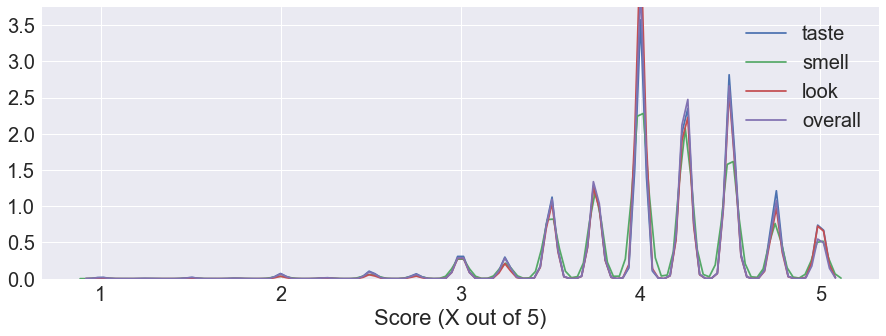

In [69]:
f, ax = plt.subplots(figsize=(15,5))

sns.distplot(beers.taste,hist=False, label = 'taste')
sns.distplot(beers.smell,hist=False, label = 'smell')
sns.distplot(beers.look,hist=False,  label = 'look')
sns.distplot(beers.overall,hist=False, label = 'overall')
ax.set(xlabel="Score (X out of 5)")


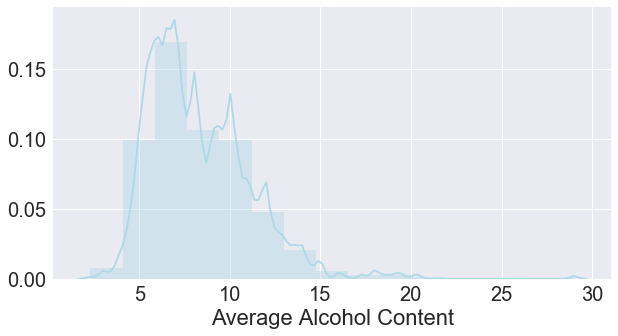

In [72]:

mask = (beers.abv != 'not listed') & (beers.abv != '')
f, ax = plt.subplots(figsize=(10,5))
sns.distplot(beers[mask].abv.astype('float'), bins=15, color='lightblue')
ax.set(xlabel="Average Alcohol Content")
sns.set(font_scale=2)

In [45]:
byrank = beers[mask & (beers['rank'] != '-')]
byrank['rank'] = byrank['rank'].astype('int')
plt.

/Users/ilyasshomayev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
mypalette = sns.color_palette("YlOrBr", n_colors=23)

/Users/ilyasshomayev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[<matplotlib.text.Text at 0x10a4d1390>, <matplotlib.text.Text at 0x1154d6400>]

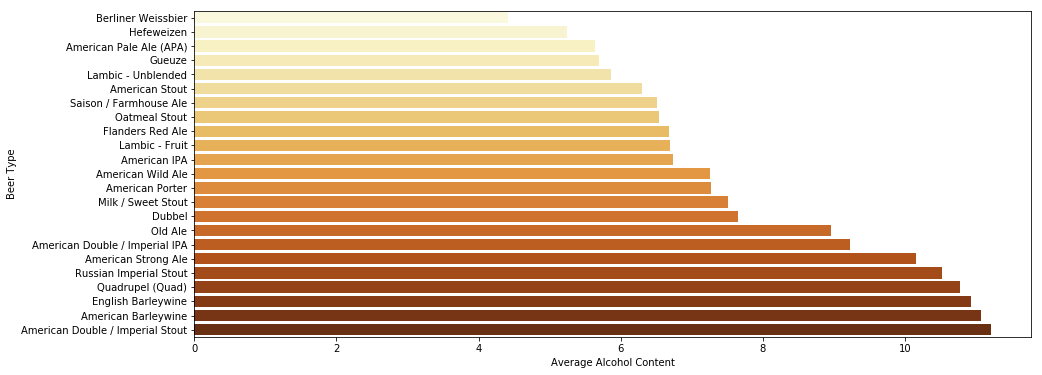

In [61]:
abv_data = beers[['name', 'abv','beer_type']].drop_duplicates()[(beers.abv != 'not listed') & (beers.abv != '')]
abv_data.abv = abv_data.abv.astype('float')
abv_data = abv_data.groupby('beer_type').mean().reset_index().sort_values('abv')
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=abv_data, y='beer_type', x='abv', palette=mypalette)
ax.set(ylabel="Beer Type",xlabel="Average Alcohol Content")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text xticklabel objects>)

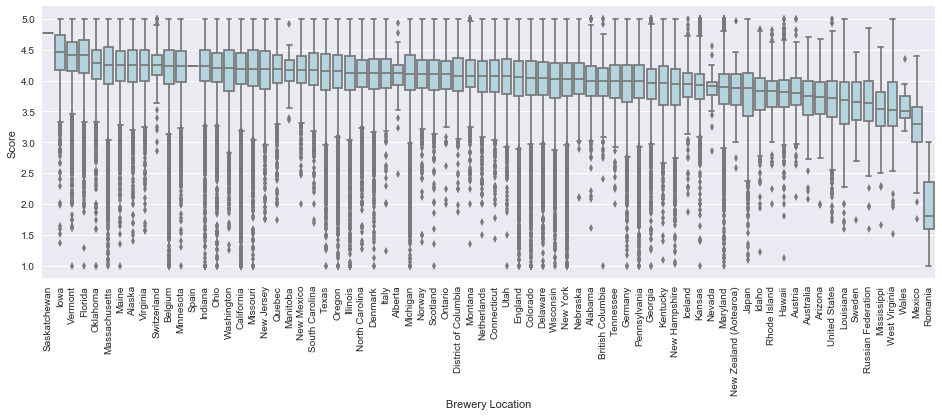

In [576]:
order_  = beers.groupby('location1').agg('median').sort_values('score', ascending=False).index
f, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(data=beers, x='location1', y='score', order=order_, color='lightblue')
ax.set(xlabel="Brewery Location",ylabel="Score")
plt.xticks(rotation=90)

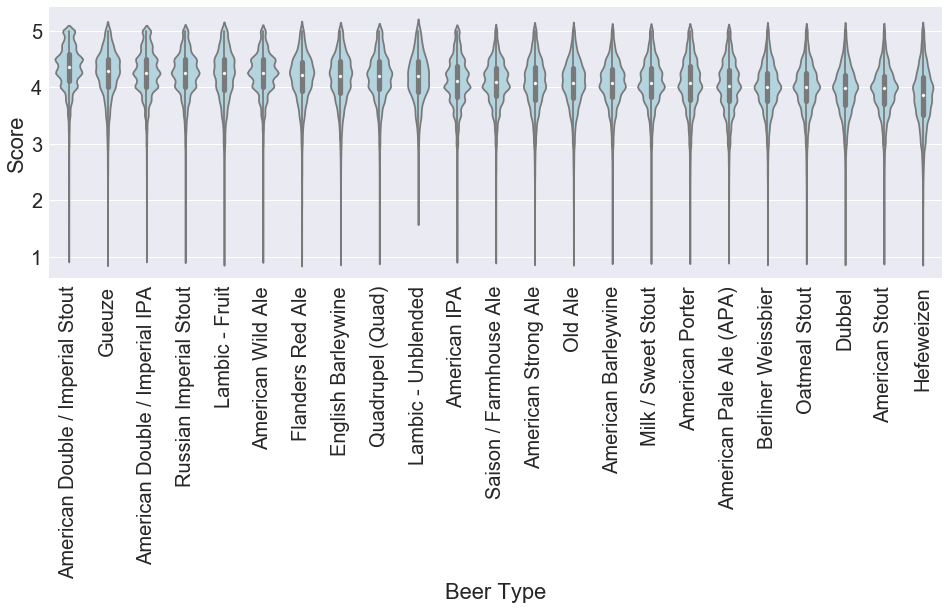

In [589]:
f, ax = plt.subplots(figsize=(16, 5))
order_  = beers.groupby('beer_type').agg('median').sort_values('score', ascending=False).index
sns.violinplot(data=beers, x='beer_type', y='score', order = order_, color='lightblue')
plt.xticks(rotation=90)
ax.set(xlabel="Beer Type",ylabel="Score")


In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool, NumeralTickFormatter

In [ ]:
output_notebook()

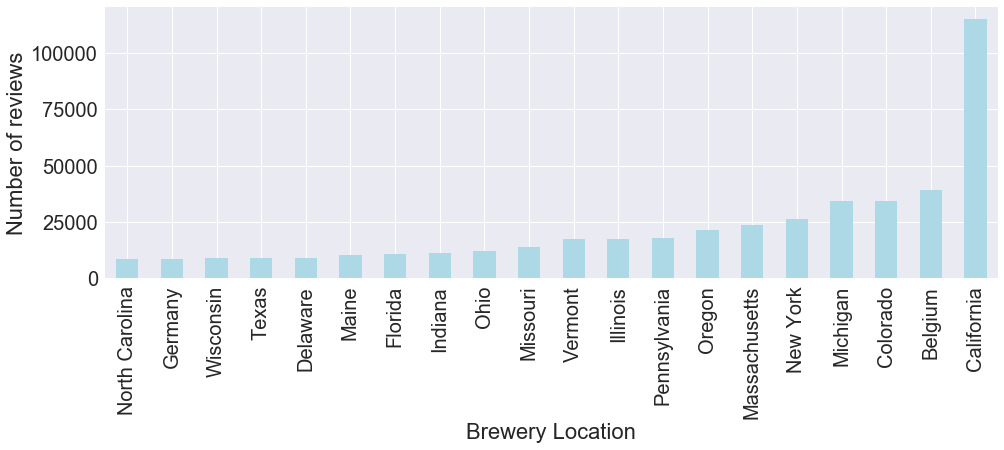

In [606]:
f, ax = plt.subplots(figsize=(16, 5))
beers.groupby('location1').brewery.count().sort_values().tail(20).plot.bar(color='lightblue')
ax.set(xlabel="Brewery Location",ylabel="Number of reviews")


In [600]:
len(beers.brewery.unique())

661

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

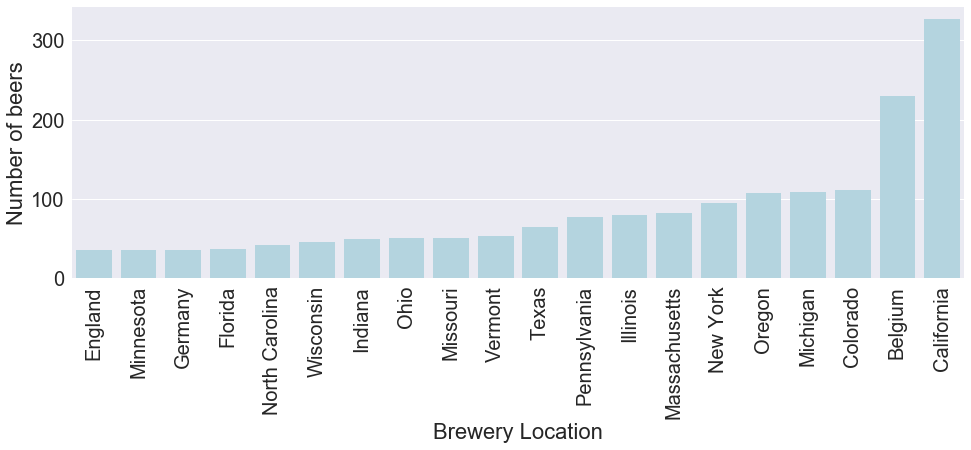

In [607]:
byloc = beers[['location1', 'name', 'beer_type']].drop_duplicates().groupby('location1').count().reset_index().sort_values('name').tail(20)
f, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x="location1", y='name', data=byloc, color='lightblue')
ax.set(xlabel="Brewery Location",ylabel="Number of beers")
plt.xticks(rotation=90)


In [27]:
beers[beers.name.str.contains('Founders')].name.unique()

array(['Founders Nitro Oatmeal Stout', 'Founders Oatmeal Stout',
       'Founders Barrel Aged Curmudgeon', 'Founders Imperial Stout',
       'Founders Curmudgeon (Old Ale)', 'Founders Porter',
       'Founders Double Trouble', 'Founders Harvest Ale',
       'Founders Devil Dancer', 'Founders Mosaic Promise',
       'Founders CBS (Canadian Breakfast Stout)',
       'Founders All Day IPA Session Ale', 'Founders Centennial IPA',
       'Founders Pale Ale', 'Founders Doom',
       'Founders KBS (Kentucky Breakfast Stout)',
       'Founders Breakfast Stout'], dtype=object)

In [37]:
beers[beers.name.str.contains('Lagunitas')].name.unique()

array(['Lagunitas Imperial Stout',
       'Lagunitas Sucks (Brown Shugga Substitute Ale)', 'Lagunitas IPA'], dtype=object)

In [45]:
beers[beers.name=='Founders Centennial IPA']

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
467766,7.20,jschwamb,American IPA,Founders Brewing Company,,"Jul 28, 2015",4.25,Michigan,United States,4.00,Founders Centennial IPA,4.50,1589,4.13,+7.7%,4.45,4.50,4.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467767,7.20,StuCovi1,American IPA,Founders Brewing Company,,"Jul 28, 2015",4.75,Michigan,United States,4.50,Founders Centennial IPA,4.50,1589,4.13,+4.8%,4.33,4.50,4.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467768,7.20,Decker,American IPA,Founders Brewing Company,,"Jul 27, 2015",4.25,Michigan,United States,4.00,Founders Centennial IPA,4.00,1589,4.13,-1%,4.09,4.25,4.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467769,7.20,ScrewBud,American IPA,Founders Brewing Company,"L - medium Amber, quick dissipating head\nS - ...","Jul 26, 2015",4.00,Michigan,United States,3.50,Founders Centennial IPA,3.50,1589,4.13,-9.7%,3.73,4.25,3.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467770,7.20,bailey0804,American IPA,Founders Brewing Company,"This is my ""go to"" IPA. Not enough citrus for ...","Jul 26, 2015",4.00,Michigan,United States,4.00,Founders Centennial IPA,4.00,1589,4.13,+0.7%,4.16,4.25,4.25,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467771,7.20,BIll_Currie,American IPA,Founders Brewing Company,Great color out of the growler. I found this a...,"Jul 25, 2015",2.50,Michigan,United States,3.75,Founders Centennial IPA,3.50,1589,4.13,-11.4%,3.66,4.50,3.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467772,7.20,hopphead31415,American IPA,Founders Brewing Company,I’m trying a variety of different beers today ...,"Jul 24, 2015",4.00,Michigan,United States,3.50,Founders Centennial IPA,4.00,1589,4.13,-9.2%,3.75,3.50,3.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467773,7.20,Andrewharemza,American IPA,Founders Brewing Company,"Almost clear, dark golden, copper big fluffy w...","Jul 24, 2015",4.25,Michigan,United States,4.25,Founders Centennial IPA,4.25,1589,4.13,+2.9%,4.25,4.25,4.25,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467774,7.20,ruzzal,American IPA,Founders Brewing Company,,"Jul 23, 2015",4.00,Michigan,United States,4.00,Founders Centennial IPA,4.25,1589,4.13,+1.5%,4.19,3.75,4.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
467775,7.20,CharlesK,American IPA,Founders Brewing Company,,"Jul 23, 2015",3.75,Michigan,United States,3.75,Founders Centennial IPA,3.50,1589,4.13,-14.3%,3.54,3.50,3.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [43]:
beers[beers.name=='Lagunitas IPA']

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
475587,6.20,UnderStageMan,American IPA,Lagunitas Brewing Company,,"Oct 11, 2015",3.75,California,United States,3.50,Lagunitas IPA,3.75,7006,3.89,-6.9%,3.62,3.25,3.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475588,6.20,kmweiss,American IPA,Lagunitas Brewing Company,,"Oct 11, 2015",3.50,California,United States,3.50,Lagunitas IPA,3.50,7006,3.89,-8.5%,3.56,3.75,3.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475589,6.20,gardner254,American IPA,Lagunitas Brewing Company,,"Oct 10, 2015",3.75,California,United States,4.00,Lagunitas IPA,3.75,7006,3.89,-1.5%,3.83,4.00,3.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475590,6.20,tappangordo,American IPA,Lagunitas Brewing Company,,"Oct 10, 2015",4.00,California,United States,4.00,Lagunitas IPA,4.00,7006,3.89,-1.3%,3.84,3.75,3.75,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475591,6.20,Tom_Banjo,American IPA,Lagunitas Brewing Company,2 12 ounce bottles purchased from a local conv...,"Oct 09, 2015",3.00,California,United States,3.00,Lagunitas IPA,3.00,7006,3.89,-22.9%,3.00,3.00,3.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475592,6.20,firkingroovin,American IPA,Lagunitas Brewing Company,,"Oct 09, 2015",4.00,California,United States,4.25,Lagunitas IPA,4.00,7006,3.89,+3.3%,4.02,4.00,4.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475593,6.20,DaaaaBeers,American IPA,Lagunitas Brewing Company,,"Oct 09, 2015",3.75,California,United States,3.75,Lagunitas IPA,4.00,7006,3.89,+0.3%,3.90,3.75,4.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475594,6.20,digitalzombie,American IPA,Lagunitas Brewing Company,,"Oct 08, 2015",3.25,California,United States,3.25,Lagunitas IPA,3.25,7006,3.89,-16.5%,3.25,3.25,3.25,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475595,6.20,dgmirelli,American IPA,Lagunitas Brewing Company,served from a bottle into a glass from a local...,"Oct 08, 2015",3.75,California,United States,3.75,Lagunitas IPA,3.75,7006,3.89,-2.6%,3.79,3.50,4.00,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
475596,6.20,Bgilanyi,American IPA,Lagunitas Brewing Company,,"Oct 08, 2015",4.25,California,United States,3.25,Lagunitas IPA,3.25,7006,3.89,-14.4%,3.33,2.75,3.50,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN


In [58]:
beers[beers.name.str.contains('Sweetwater IPA')].groupby('name').agg('mean')

,feel,look,overall,rating,score,smell,taste,url_beer,url_beer_type,url_brewery
name,,,,,,,,,,
Sweetwater IPA,3.901961,3.933824,3.961703,3.97,3.961667,3.934743,3.992341,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

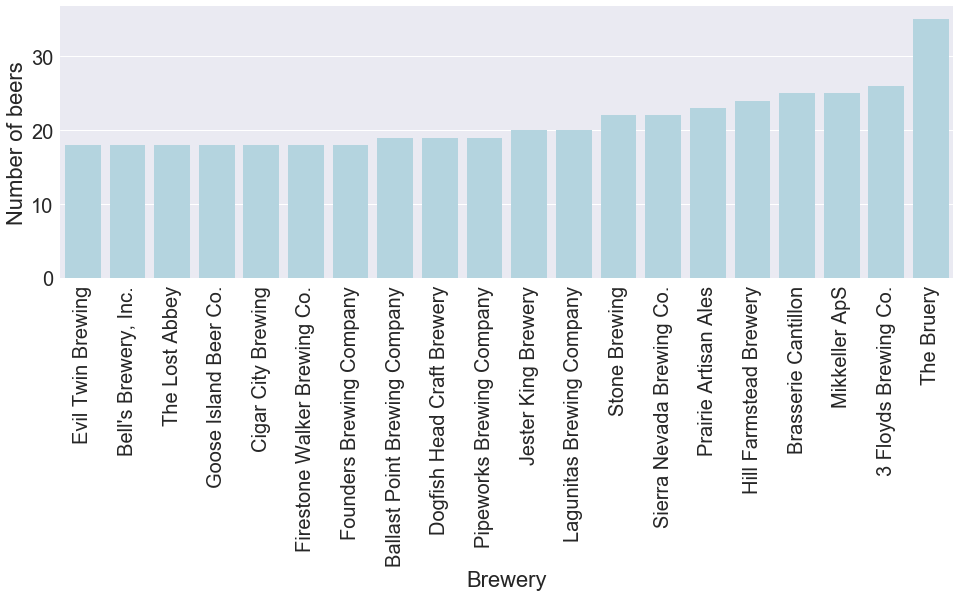

In [612]:
bybrewery = beers[['name', 'brewery']].drop_duplicates().groupby('brewery').count().sort_values('name').reset_index().tail(20)
bybrewery

f, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x="brewery", y='name', data=bybrewery, color='lightblue')
ax.set(xlabel="Brewery",ylabel="Number of beers")
plt.xticks(rotation=90)

In [42]:
beers[beers.name=='Saison Avec Miel Et Vin'].groupby('name').mean()

,feel,look,overall,rating,score,smell,taste,url_beer,url_beer_type,url_brewery
name,,,,,,,,,,
Saison Avec Miel Et Vin,4.0,4.75,5.0,4.77,4.77,4.5,5.0,NaN,NaN,NaN


In [46]:
import nltk

In [47]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [53]:
from nltk import word_tokenize

In [70]:
from nltk.stem import PorterStemmer

In [208]:
def count_unique(mylist):
    uniques = list(set(mylist))
    outlist = []
    for unique in uniques:
        counter = 0
        for word in mylist:
            if word == unique:
                counter += 1
        outlist.append([unique, counter])
    return outlist

In [115]:
beers[beers.location1=='Romania'].content

24279                                                     
24280                                                     
24281    3 years after the BB date. Almost clear golden...
24282    So many beers I've drank in the past that I di...
24283    I couldn't convince myself to drink this sober...
24284    Going with BJCP descriptors.\n\nLook - Rich Go...
24285    Alcohol is heavy in this, as would be expected...
24286                                                     
24287    Poured from a brown 16.9 oz. bottle. Has a ver...
24288                                                     
24289    Whoa..... this beer is absolutely terrible.  I...
24290    Romania. Land of castles. Beautiful, black-eye...
24291    (Served in a snifter)\n\nA- This beer pours a ...
24292    Served in a Gale Sayers shaker pint glass.\n\n...
Name: content, dtype: object

In [116]:
from nltk.stem import WordNetLemmatizer

In [117]:
lemmatizer = WordNetLemmatizer()

In [123]:
from nltk.corpus import wordnet

In [128]:
#number of reviews with text
beers[beers.content != ''].groupby('beer_type').content.count()

beer_type
American Barleywine                  8543
American Double / Imperial IPA      12215
American Double / Imperial Stout    13138
American IPA                        12834
American Pale Ale (APA)             12562
American Porter                     11745
American Stout                       7130
American Strong Ale                  6235
American Wild Ale                    6129
Berliner Weissbier                   2839
Dubbel                               5897
English Barleywine                   5479
Flanders Red Ale                     2325
Gueuze                               2521
Hefeweizen                           9382
Lambic - Fruit                       5022
Lambic - Unblended                    658
Milk / Sweet Stout                   7464
Oatmeal Stout                        8553
Old Ale                              5245
Quadrupel (Quad)                     6521
Russian Imperial Stout              13116
Saison / Farmhouse Ale               8481
Name: content, dtype: in

In [295]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
from spacy.en import English
parser = English()
import spacy
nlp = spacy.load('en')

In [330]:
def get_adj(reviews):
    adjectives = []
    for sent in map(nlp, reviews): #applies nlp function from spacy 
        for token in sent:
            if token.pos_ == 'ADJ' and token.orth_ not in stopWords: #checks for adjectives and ignores stopwords(from NLTK)
                adjectives.append(token.orth_.lower()) #adds adjective(string) to outpiut list
    return adjectives

In [613]:
#iterates through beertypes and puts adjectives into a dictionary
beertypes = beers.beer_type.unique()
beertypes_dic = {}
for btype in beertypes: 
    print(btype) 
    mask = (beers.beer_type == btype) & (beers.content != '')
    beertypes_dic[btype] = get_adj(beers[mask].content)
    

American Barleywine
Old Ale
Berliner Weissbier
Saison / Farmhouse Ale
Oatmeal Stout
English Barleywine
Milk / Sweet Stout
Russian Imperial Stout


KeyboardInterrupt: 

In [335]:
#check for difference in words and unique words
for key in beertypes_dic:
    print(key, '   ', len(beertypes_dic[key]), 'words total   ', len(set(beertypes_dic[key])), 'unique words')
    print('-'*60)


American Barleywine     147425 words total    4161 unique words
------------------------------------------------------------
Old Ale     89460 words total    3178 unique words
------------------------------------------------------------
Berliner Weissbier     37841 words total    1932 unique words
------------------------------------------------------------
Saison / Farmhouse Ale     135343 words total    3774 unique words
------------------------------------------------------------
Oatmeal Stout     129140 words total    3394 unique words
------------------------------------------------------------
English Barleywine     90341 words total    3199 unique words
------------------------------------------------------------
Milk / Sweet Stout     100778 words total    3000 unique words
------------------------------------------------------------
Russian Imperial Stout     213955 words total    4552 unique words
------------------------------------------------------------
Hefeweizen     130

In [345]:
word_stats = [[key, len(beertypes_dic[key]), len(set(beertypes_dic[key]))] for key in beertypes_dic]
word_stats = pd.DataFrame(word_stats, columns= ['beer_type', 'words', 'unique'])
word_stats

,beer_type,words,unique
0,American Barleywine,147425,4161
1,Old Ale,89460,3178
2,Berliner Weissbier,37841,1932
3,Saison / Farmhouse Ale,135343,3774
4,Oatmeal Stout,129140,3394
5,English Barleywine,90341,3199
6,Milk / Sweet Stout,100778,3000
7,Russian Imperial Stout,213955,4552
8,Hefeweizen,130010,3710
9,Lambic - Fruit,83148,3037


In [374]:
import math
log_stats = word_stats.groupby('beer_type').agg(math.log).reset_index()
log_stats

,beer_type,words,unique
0,American Barleywine,11.901075,8.333511
1,American Double / Imperial IPA,11.843437,8.187855
2,American Double / Imperial Stout,12.050050,8.261785
3,American IPA,11.787355,8.129764
4,American Pale Ale (APA),12.043424,8.265907
5,American Porter,12.014579,8.240913
6,American Stout,11.552848,8.009695
7,American Strong Ale,11.484547,8.117312
8,American Wild Ale,11.485061,8.002025
9,Berliner Weissbier,10.541148,7.566311


In [472]:
word_stats['ratio'] = word_stats.unique/word_stats.words
word_stats

,beer_type,words,unique,ratio
0,American Barleywine,147425,4161,0.028225
1,Old Ale,89460,3178,0.035524
2,Berliner Weissbier,37841,1932,0.051056
3,Saison / Farmhouse Ale,135343,3774,0.027885
4,Oatmeal Stout,129140,3394,0.026282
5,English Barleywine,90341,3199,0.035410
6,Milk / Sweet Stout,100778,3000,0.029768
7,Russian Imperial Stout,213955,4552,0.021276
8,Hefeweizen,130010,3710,0.028536
9,Lambic - Fruit,83148,3037,0.036525


In [64]:
sns.set_color_codes("pastel")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

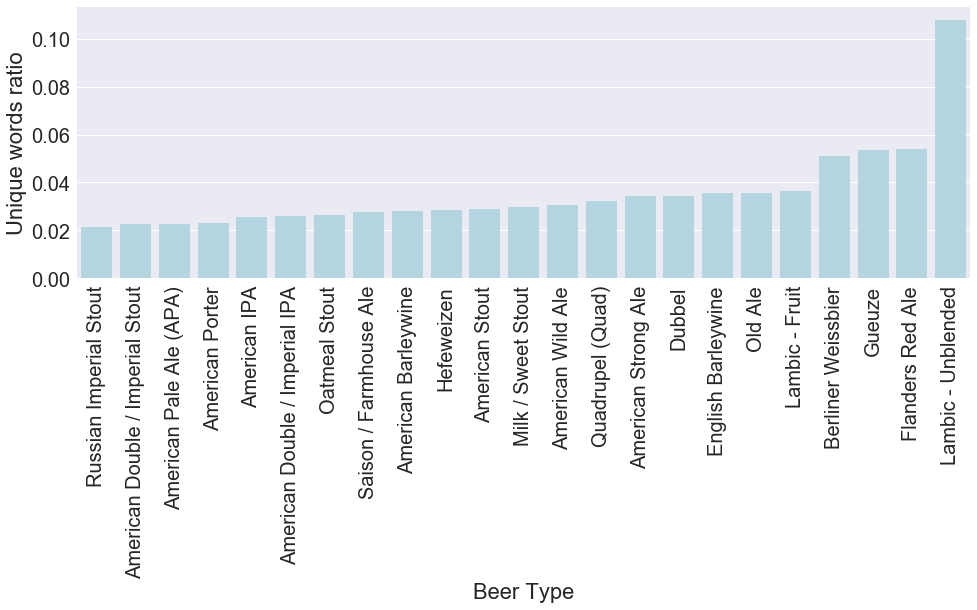

In [620]:
f, ax = plt.subplots(figsize=(16, 5))
sns.barplot(x="beer_type", y="ratio", data=word_stats.sort_values('ratio'),
            label="Word Ratio", color = 'lightblue')
ax.set(xlabel="Beer Type",ylabel="Unique words ratio")
plt.xticks(rotation=90)

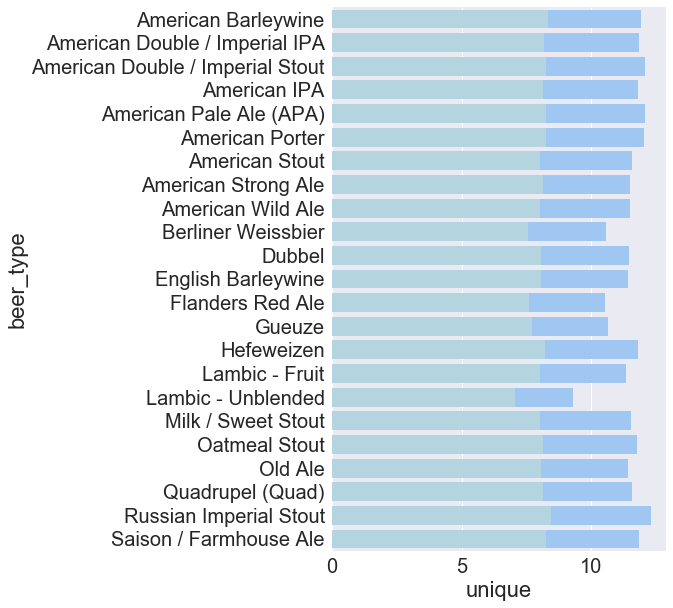

In [615]:
plt.figure(figsize=(6,10))
sns.barplot(y="beer_type", x="words", data=log_stats,
            label="Total Words", color="b")
sns.barplot(y="beer_type", x="unique", data=log_stats,
            label="Unique Words", color="lightblue")

In [131]:
from spacy.en import English
parser = English()
import spacy
nlp = spacy.load('en')

In [386]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [392]:
stopwords = set(STOPWORDS)
stopwords.add("good")
stopwords.add("nice")
stopwords.add('great')
stopwords.add('small')
stopwords.add('medium')
stopwords.add('large')
stopwords.add('better')
stopwords.add('worse')
stopwords.add("best")
stopwords.add("worst")
stopwords.add("little")
stopwords.add("big")
stopwords.add("moderate")
stopwords.add('low')
stopwords.add('high')

In [460]:
wc = WordCloud(width=4000, height=2000, background_color="black", max_words=100, stopwords=stopwords)# generate word cloud
wc.generate(' '.join(beertypes_dic['Saison / Farmhouse Ale']))

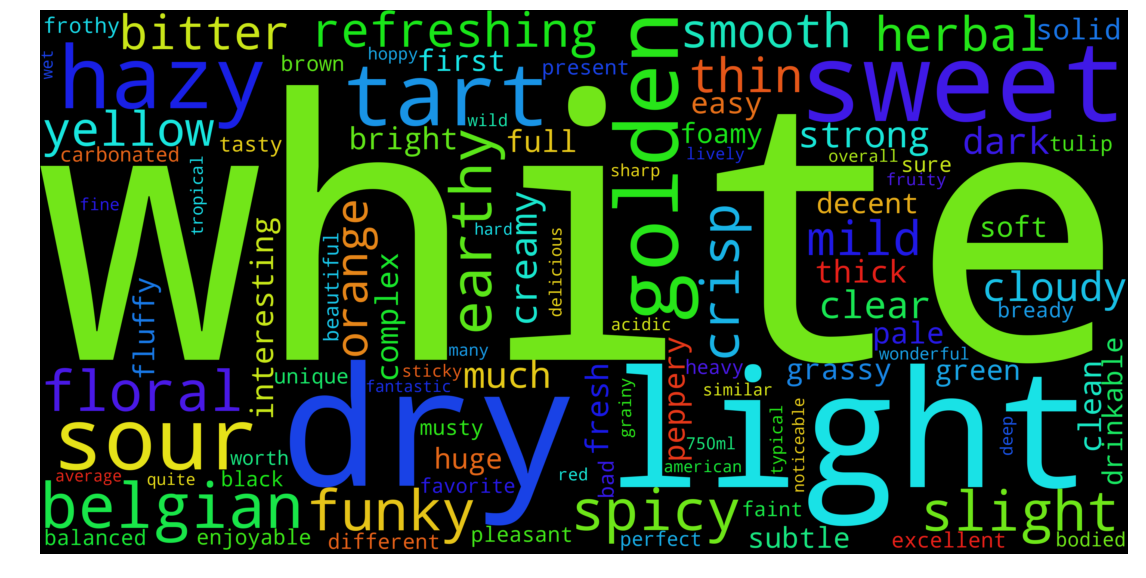

In [461]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
beers[beers.location1.str.contains('Sas')]

,abv,author,beer_type,brewery,content,date,feel,location1,location2,look,name,overall,rank,rating,rdev,score,smell,taste,url_author,url_beer,url_beer_type,url_brewery
195040,7.00,LoganX,Lambic - Unblended,Prairie Sun Brewery,This is a very unique beer. It started life as...,"Mar 14, 2017",4.0,Saskatchewan,Canada,4.75,Saison Avec Miel Et Vin,5.0,-,4.77,rDev 0%,4.77,4.5,5.0,https://www.beeradvocate.com/community/members...,NaN,NaN,NaN
